<center>
<img src="https://2223moodle.isel.pt/pluginfile.php/1/theme_adaptable/logo/1631635830/logo-isel_inv3.png" width="250">
<h3>Licenciatura em Engenharia Informática e Multimédia</h3><br>
<br>
<h2>Aprendizagem Automática (AA)</h3>
<h3>2º Trabalho Laboratorial – Classificação de Críticas de Cinema do IMDb </h3>
<br>

<br>
Trabalho Realizado por:<br>
Gonçalo Silva <b>A48328</b><br>
Diogo Lobo <b>A48168</b><br>
Turma 52D<br><br>
Docente: Gonçalo Xufre <br>
<br>
9 de Dezembro de 2024
</center>


In [154]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
import re
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as aggClus
from scipy.cluster.hierarchy import dendrogram

In [155]:
import itertools

def plotMatriz(modelo,xtest,ytest,string):
    y_pred = modelo.predict(xtest)
    print(classification_report(ytest, y_pred))
    plt.figure(figsize=(6,6))
    sns.heatmap(confusion_matrix(ytest, y_pred),annot=True,fmt='g')
    plt.title(string)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [156]:
def plotMatrizRegression(modelo,xtest,ytest,string):
    y_pred = modelo.predict(xtest)
    # Arredondamento
    y_pred = np.round(y_pred)

    # Limitar os valores no intervalo [1, 10]
    y_pred = np.clip(y_pred, 1, 10)

    y_pred[y_pred == 5] = 4  # Transforma 5 em 4
    y_pred[y_pred == 6] = 7  # Transforma 6 em 7
    
    print(classification_report(ytest, y_pred))
    plt.figure(figsize=(6,6))
    sns.heatmap(confusion_matrix(y_pred,ytest),annot=True,fmt='g')
    plt.title(string)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [157]:
D = pickle.load(open('imdbFull.p','rb'))

In [158]:
Docs = D.data
y = D.target
descr = D.DESCR
print(descr)
print(len(Docs))
print(len(y))


This dataset contains movie reviews along with their associated binary sentiment polarity labels. It is intended to serve as a benchmark for sentiment classification. This document outlines how the dataset was gathered, and how to use the files provided.
For more details see: http://ai.stanford.edu/~amaas/data/sentiment/
50000
50000


In [159]:
# from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer

# porterStemFunc = PorterStemmer()
# Docs_PorterStem = [' '.join([porterStemFunc.stem(word) for word in doc.split()]) for doc in Docs]
# pickle.dump(Docs_PorterStem,open('docsPorterStem.p','wb'))

# snowballSteamFunc = SnowballStemmer('english')
# Docs_SnowballStem = [' '.join([snowballSteamFunc.stem(word) for word in doc.split()]) for doc in Docs]
# pickle.dump(Docs_SnowballStem,open('docsSnowballStem.p','wb'))

# lancasterStemFunc = LancasterStemmer()
# Docs_LancasterStem = [' '.join([lancasterStemFunc.stem(word) for word in doc.split()]) for doc in Docs]
# pickle.dump(Docs_PorterStem,open('docsLancasterStem.p','wb'))

# print(Docs_PorterStem[0])
# print(Docs_SnowballStem[0])
# print(Docs_LancasterStem[0])



In [160]:
DocsPorterStem = pickle.load(open('docsPorterStem.p','rb'))
DocsSnowballStem = pickle.load(open('docsSnowballStem.p','rb'))
DocsLancasterStem = pickle.load(open('docslancasterStem.p','rb'))

print(DocsPorterStem[0])
print(DocsSnowballStem[0])
print(DocsLancasterStem[0])

zero day lead you to think, even re-think whi two boys/young men would do what they did - commit mutual suicid via slaughter their classmates. it captur what must be beyond a bizarr mode of be for two human who have decid to withdraw from common civil in order to defin their own/mutu world via coupl destruction.<br /><br />it is not a perfect movi but given what money/tim the filmmak and actor had - it is a remark product. in term of explain the motiv and action of the two young suicide/murder it is better than 'elephant' - in term of be a film that get under our 'rationalistic' skin it is a far, far better film than almost anyth you are like to see. <br /><br />flaw but honest with a terribl honesty.
zero day lead you to think, even re-think whi two boys/young men would do what they did - commit mutual suicid via slaughter their classmates. it captur what must be beyond a bizarr mode of be for two human who have decid to withdraw from common civil in order to defin their own/mutu worl

In [161]:
# print(DocsLancasterStem[0])
DocsReplace = [doc.replace('<br />', ' ') for doc in Docs]
DocsFinal =[re.sub(r'[^a-z-A-Z\u00c0-\u00FF]+',' ',doc)for doc in DocsReplace]
print(Docs[0])
# Tfidf = TfidfVectorizer(ngram_range=(1,2),min_df=10,token_pattern=r'\b\w\w+\b').fit(Docs)
Tfidf = TfidfVectorizer(min_df=10,token_pattern=r'\b\w\w+\b').fit(DocsFinal)
X = Tfidf.transform(DocsFinal)
print(X.shape)

Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.
(50000, 25759)


In [162]:
DocsTrain, DocsTest, ytrain, ytest = train_test_split(X,y,test_size=0.50,shuffle=False,random_state=18)
DocsValTrain, DocsValTest, yValTrain, yValTest = train_test_split(DocsTrain,ytrain,test_size=0.2,random_state=18,shuffle=False)

--- 

## Logistic Regression

In [163]:
LogReg = LogisticRegression(penalty='l2',C=1,max_iter=1000,tol=0.0001,solver='lbfgs',random_state=18)
LogReg.fit(DocsValTrain,yValTrain)
print(LogReg.score(DocsValTrain,yValTrain))
print(LogReg.score(DocsValTest,yValTest))

0.7064
0.4324


              precision    recall  f1-score   support

           1       0.54      0.85      0.66      1018
           2       0.29      0.07      0.11       454
           3       0.32      0.14      0.19       481
           4       0.41      0.38      0.39       539
           7       0.35      0.26      0.29       525
           8       0.28      0.26      0.27       618
           9       0.19      0.04      0.06       441
          10       0.44      0.74      0.55       924

    accuracy                           0.43      5000
   macro avg       0.35      0.34      0.32      5000
weighted avg       0.38      0.43      0.38      5000



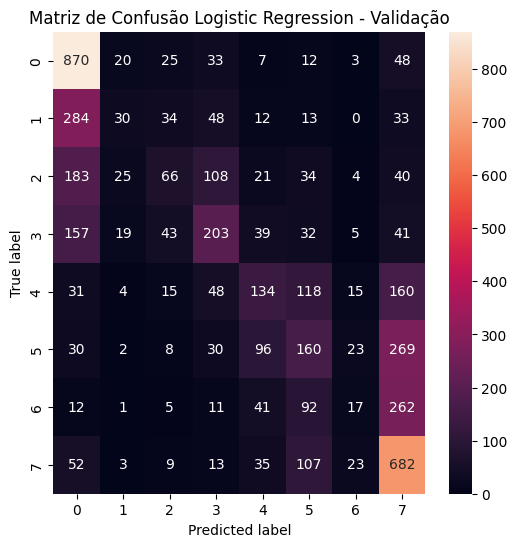

In [164]:
plotMatriz(LogReg,DocsValTest,yValTest,'Matriz de Confusão Logistic Regression - Validação')

In [165]:
LogReg.fit(DocsTrain,ytrain)
print(LogReg.score(DocsTrain,ytrain))
print(LogReg.score(DocsTest,ytest))

0.69212
0.42588


              precision    recall  f1-score   support

           1       0.53      0.82      0.64      5022
           2       0.21      0.06      0.09      2302
           3       0.27      0.12      0.17      2541
           4       0.32      0.33      0.33      2635
           7       0.33      0.25      0.28      2307
           8       0.27      0.24      0.26      2850
           9       0.23      0.04      0.07      2344
          10       0.48      0.77      0.59      4999

    accuracy                           0.43     25000
   macro avg       0.33      0.33      0.30     25000
weighted avg       0.37      0.43      0.37     25000



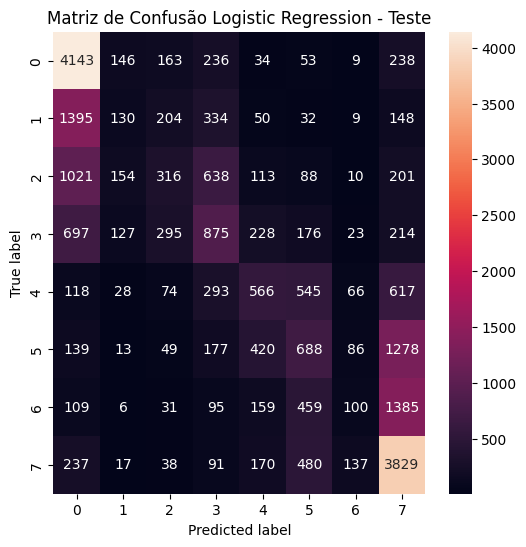

In [166]:
plotMatriz(LogReg,DocsTest,ytest,'Matriz de Confusão Logistic Regression - Teste')

--- 

## SVC

In [167]:
svc = LinearSVC(C=.1,max_iter=1000,dual=False,fit_intercept=False,penalty='l2',loss='squared_hinge',class_weight=None,random_state=18)

svc.fit(DocsValTrain, yValTrain)

print('Score treino: ', svc.score(DocsValTrain, yValTrain))
print('Score teste: ', svc.score(DocsValTest,yValTest))   

Score treino:  0.69085
Score teste:  0.429


              precision    recall  f1-score   support

           1       0.51      0.88      0.65      1018
           2       0.33      0.06      0.10       454
           3       0.30      0.09      0.14       481
           4       0.42      0.35      0.38       539
           7       0.35      0.26      0.30       525
           8       0.28      0.23      0.25       618
           9       0.19      0.03      0.06       441
          10       0.44      0.76      0.56       924

    accuracy                           0.43      5000
   macro avg       0.35      0.33      0.30      5000
weighted avg       0.38      0.43      0.36      5000



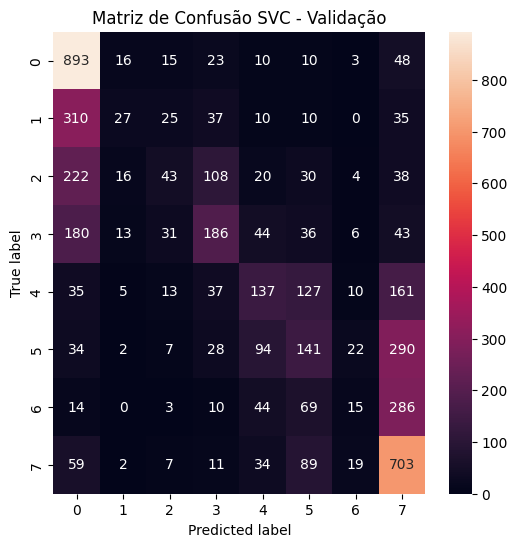

In [168]:
plotMatriz(svc,DocsValTest,yValTest,'Matriz de Confusão SVC - Validação')

In [169]:
svc.fit(DocsTrain,ytrain)
print(svc.score(DocsTrain,ytrain))
print(svc.score(DocsTest,ytest))

0.67276
0.42436


              precision    recall  f1-score   support

           1       0.50      0.86      0.63      5022
           2       0.18      0.04      0.06      2302
           3       0.26      0.09      0.13      2541
           4       0.33      0.32      0.32      2635
           7       0.32      0.23      0.27      2307
           8       0.28      0.21      0.24      2850
           9       0.22      0.03      0.06      2344
          10       0.48      0.79      0.59      4999

    accuracy                           0.42     25000
   macro avg       0.32      0.32      0.29     25000
weighted avg       0.35      0.42      0.36     25000



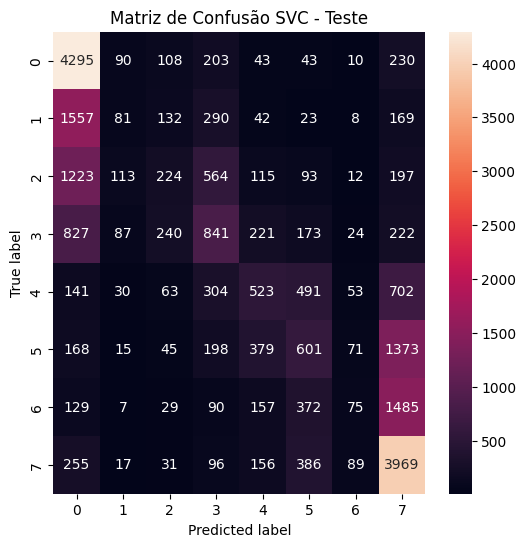

In [170]:
plotMatriz(svc,DocsTest,ytest,'Matriz de Confusão SVC - Teste')

---

## SVR

              precision    recall  f1-score   support

           1       0.69      0.26      0.37      1018
           2       0.18      0.16      0.17       454
           3       0.17      0.19      0.18       481
           4       0.23      0.49      0.31       539
           7       0.20      0.50      0.29       525
           8       0.25      0.24      0.24       618
           9       0.21      0.21      0.21       441
          10       0.61      0.15      0.24       924

    accuracy                           0.26      5000
   macro avg       0.32      0.27      0.25      5000
weighted avg       0.38      0.26      0.27      5000



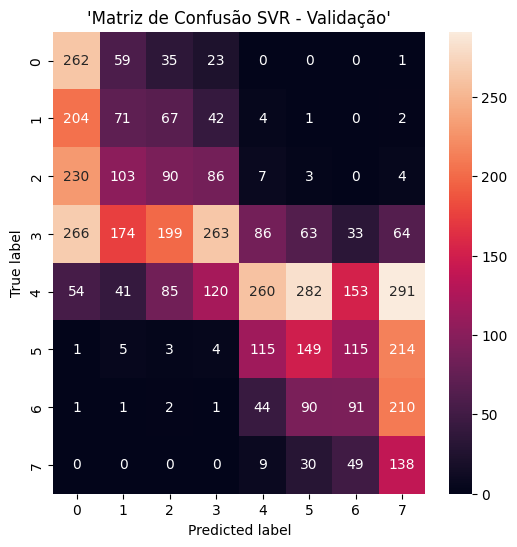

Score (treino): 0.7439071813734789
Score (teste): 0.6259111618349971


In [171]:
linearSVR =LinearSVR(C=1.0,dual=True,epsilon=0.5,loss='epsilon_insensitive',max_iter=2000,random_state=18)
linearSVR.fit(DocsValTrain,yValTrain)

plotMatrizRegression(linearSVR,DocsValTest,yValTest,"'Matriz de Confusão SVR - Validação'")
# Avaliar o modelo no conjunto de treino e teste
print("Score (treino):", linearSVR.score(DocsValTrain, yValTrain))
print("Score (teste):", linearSVR.score(DocsValTest, yValTest))


              precision    recall  f1-score   support

           1       0.66      0.24      0.35      5022
           2       0.20      0.16      0.17      2302
           3       0.19      0.19      0.19      2541
           4       0.22      0.52      0.31      2635
           7       0.18      0.54      0.27      2307
           8       0.21      0.21      0.21      2850
           9       0.20      0.15      0.17      2344
          10       0.64      0.13      0.22      4999

    accuracy                           0.25     25000
   macro avg       0.31      0.27      0.24     25000
weighted avg       0.38      0.25      0.25     25000



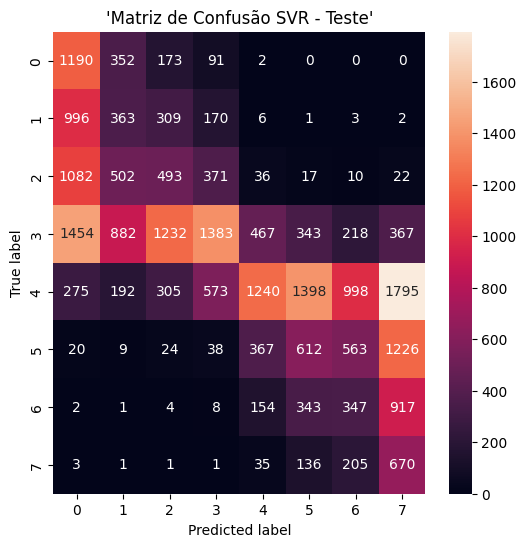

0.7408412746332026
0.6065147392060002


In [172]:
linearSVR.fit(DocsTrain,ytrain)


plotMatrizRegression(linearSVR,DocsTest,ytest,"'Matriz de Confusão SVR - Teste'")

print(linearSVR.score(DocsTrain,ytrain))
print(linearSVR.score(DocsTest,ytest))

---

## Linear Regression

              precision    recall  f1-score   support

           1       0.37      0.42      0.39      1018
           2       0.12      0.08      0.10       454
           3       0.10      0.06      0.07       481
           4       0.12      0.16      0.14       539
           7       0.12      0.15      0.13       525
           8       0.16      0.10      0.12       618
           9       0.14      0.09      0.11       441
          10       0.33      0.41      0.37       924

    accuracy                           0.23      5000
   macro avg       0.18      0.18      0.18      5000
weighted avg       0.21      0.23      0.22      5000



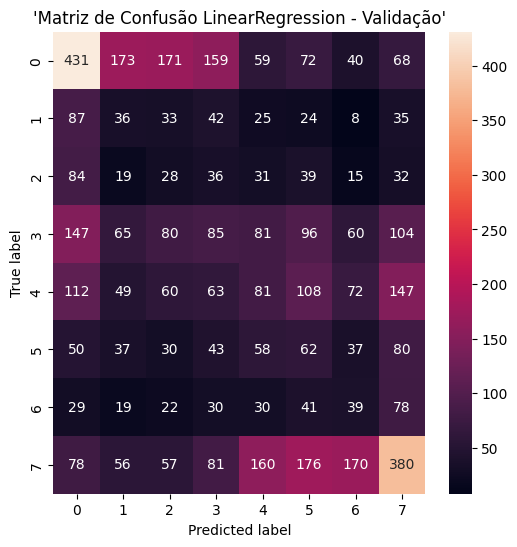

Score treino:  0.9999979239265767
Score validação:  -1.1849179353318142


In [173]:
linearRegression = LinearRegression(copy_X=True,fit_intercept=True,positive=False)

linearRegression.fit(DocsValTrain, yValTrain)

plotMatrizRegression(linearRegression,DocsValTest,yValTest,"'Matriz de Confusão LinearRegression - Validação'")

print('Score treino: ', linearRegression.score(DocsValTrain, yValTrain))
print('Score validação: ', linearRegression.score(DocsValTest, yValTest))

              precision    recall  f1-score   support

           1       0.23      0.49      0.32      5022
           2       0.14      0.04      0.06      2302
           3       0.15      0.04      0.06      2541
           4       0.13      0.06      0.08      2635
           7       0.11      0.06      0.08      2307
           8       0.12      0.03      0.04      2850
           9       0.11      0.03      0.04      2344
          10       0.24      0.46      0.32      4999

    accuracy                           0.21     25000
   macro avg       0.15      0.15      0.12     25000
weighted avg       0.17      0.21      0.16     25000



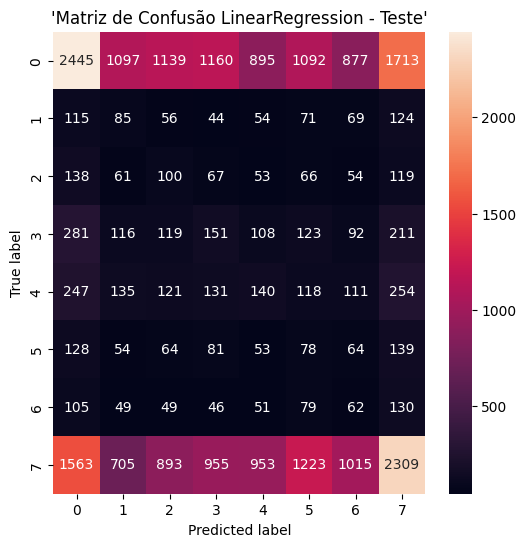

0.9999808132405391
-29.94399313225857


In [174]:
linearRegression.fit(DocsTrain,ytrain)
plotMatrizRegression(linearRegression,DocsTest,ytest,"'Matriz de Confusão LinearRegression - Teste'")
print(linearRegression.score(DocsTrain,ytrain))
print(linearRegression.score(DocsTest,ytest))

---

## Bi-Gramas

In [175]:
DocsReplace_bg = [doc.replace('<br />', ' ') for doc in Docs]
Docs_bg =[re.sub(r'[^a-z-A-Z\u00c0-\u00FF]+',' ',doc)for doc in DocsReplace_bg]
print(Docs_bg[0])
Tfidf_bg = TfidfVectorizer(ngram_range=(1,2),min_df=10,token_pattern=r'\b\w\w+\b').fit(Docs_bg)
# Tfidf = TfidfVectorizer(min_df=10,token_pattern=r'\b\w\w+\b').fit(Docs)
X_bg = Tfidf_bg.transform(Docs_bg)

Zero Day leads you to think even re-think why two boys young men would do what they did - commit mutual suicide via slaughtering their classmates It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own mutual world via coupled destruction It is not a perfect movie but given what money time the filmmaker and actors had - it is a remarkable product In terms of explaining the motives and actions of the two young suicide murderers it is better than Elephant - in terms of being a film that gets under our rationalistic skin it is a far far better film than almost anything you are likely to see Flawed but honest with a terrible honesty 


In [176]:
DocsTrain_bg, DocsTest_bg, ytrain_bg, ytest_bg = train_test_split(X_bg,y,test_size=0.50,shuffle=False,random_state=18)
DocsValTrain_bg, DocsValTest_bg, yValTrain_bg, yValTest_bg = train_test_split(DocsTrain_bg,ytrain_bg,test_size=0.2,random_state=18,shuffle=False)

---

## Logistic Regression - Bi-Gramas

In [177]:
LogReg_bg = LogisticRegression(penalty='l2',C=1,max_iter=1000,tol=0.0001,solver='lbfgs',random_state=18)
LogReg_bg.fit(DocsValTrain_bg,yValTrain_bg)
print(LogReg_bg.score(DocsValTrain_bg,yValTrain_bg))
print(LogReg_bg.score(DocsValTest_bg,yValTest_bg))

0.81
0.4336


              precision    recall  f1-score   support

           1       0.51      0.89      0.65      1018
           2       0.27      0.03      0.06       454
           3       0.28      0.07      0.12       481
           4       0.40      0.36      0.38       539
           7       0.37      0.23      0.29       525
           8       0.31      0.25      0.28       618
           9       0.20      0.02      0.04       441
          10       0.44      0.79      0.56       924

    accuracy                           0.43      5000
   macro avg       0.35      0.33      0.30      5000
weighted avg       0.37      0.43      0.36      5000



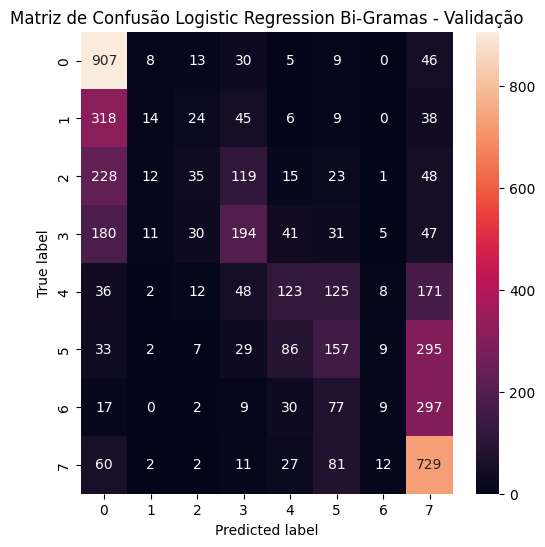

In [178]:
plotMatriz(LogReg_bg,DocsValTest_bg,yValTest_bg,'Matriz de Confusão Logistic Regression Bi-Gramas - Validação')

In [179]:
LogReg_bg.fit(DocsTrain_bg,ytrain_bg)
print(LogReg_bg.score(DocsTrain_bg,ytrain_bg))
print(LogReg_bg.score(DocsTest_bg,ytest_bg))

0.80444
0.43688


              precision    recall  f1-score   support

           1       0.51      0.87      0.64      5022
           2       0.23      0.03      0.05      2302
           3       0.30      0.10      0.15      2541
           4       0.34      0.34      0.34      2635
           7       0.34      0.22      0.27      2307
           8       0.28      0.24      0.26      2850
           9       0.23      0.02      0.03      2344
          10       0.48      0.82      0.60      4999

    accuracy                           0.44     25000
   macro avg       0.34      0.33      0.29     25000
weighted avg       0.37      0.44      0.36     25000



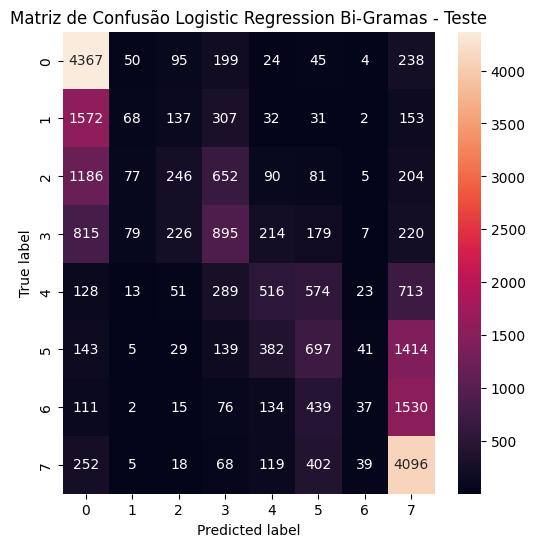

In [180]:
plotMatriz(LogReg_bg,DocsTest_bg,ytest_bg,'Matriz de Confusão Logistic Regression Bi-Gramas - Teste')

---

## SVC - Bi-Gramas

In [181]:
svc_bg = LinearSVC(C=.1,max_iter=1000,dual=False,fit_intercept=False,penalty='l2',loss='squared_hinge',class_weight=None,random_state=18)

svc_bg.fit(DocsValTrain_bg, yValTrain_bg)

print('Score treino: ', svc_bg.score(DocsValTrain_bg, yValTrain_bg))
print('Score teste: ', svc_bg.score(DocsValTest_bg,yValTest_bg))   

Score treino:  0.8045
Score teste:  0.4302


              precision    recall  f1-score   support

           1       0.49      0.90      0.64      1018
           2       0.39      0.03      0.06       454
           3       0.27      0.06      0.10       481
           4       0.44      0.34      0.38       539
           7       0.37      0.23      0.28       525
           8       0.30      0.23      0.26       618
           9       0.17      0.02      0.03       441
          10       0.43      0.79      0.56       924

    accuracy                           0.43      5000
   macro avg       0.36      0.33      0.29      5000
weighted avg       0.38      0.43      0.35      5000



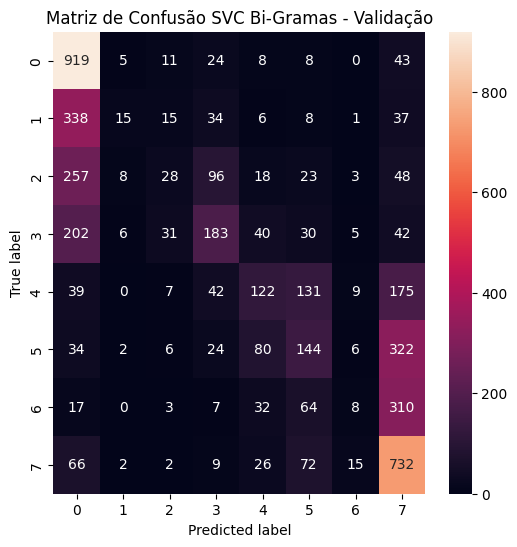

In [182]:
plotMatriz(svc_bg,DocsValTest_bg,yValTest_bg,'Matriz de Confusão SVC Bi-Gramas - Validação')

In [183]:
svc_bg.fit(DocsTrain_bg,ytrain_bg)
print(svc_bg.score(DocsTrain_bg,ytrain_bg))
print(svc_bg.score(DocsTest_bg,ytest_bg))

0.79272
0.43612


              precision    recall  f1-score   support

           1       0.49      0.89      0.63      5022
           2       0.22      0.02      0.04      2302
           3       0.32      0.08      0.13      2541
           4       0.35      0.33      0.34      2635
           7       0.34      0.22      0.27      2307
           8       0.28      0.21      0.24      2850
           9       0.23      0.01      0.03      2344
          10       0.48      0.83      0.61      4999

    accuracy                           0.44     25000
   macro avg       0.34      0.33      0.29     25000
weighted avg       0.37      0.44      0.36     25000



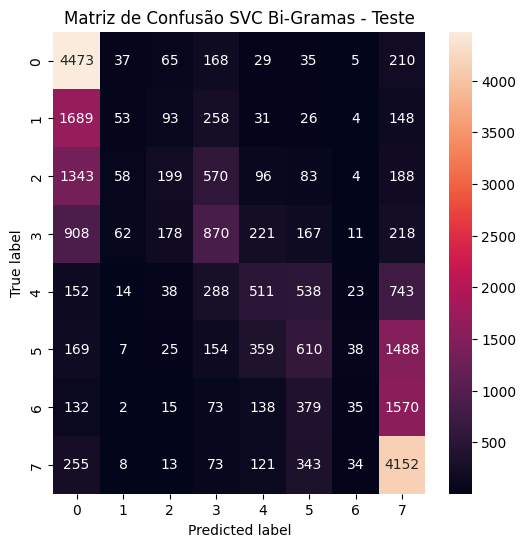

In [184]:
plotMatriz(svc_bg,DocsTest_bg,ytest_bg,'Matriz de Confusão SVC Bi-Gramas - Teste')

---

## SVR - Bi-Gramas

              precision    recall  f1-score   support

           1       0.72      0.24      0.36      1018
           2       0.18      0.15      0.16       454
           3       0.19      0.22      0.20       481
           4       0.24      0.53      0.34       539
           7       0.21      0.56      0.31       525
           8       0.24      0.24      0.24       618
           9       0.20      0.18      0.19       441
          10       0.60      0.13      0.21       924

    accuracy                           0.27      5000
   macro avg       0.32      0.28      0.25      5000
weighted avg       0.39      0.27      0.26      5000



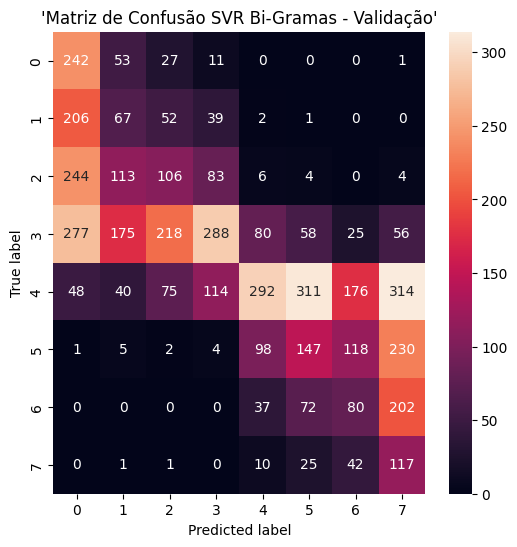

0.8071668832637967
0.6431361230845003


In [185]:
linearSVR_bg =LinearSVR(C=1.0,dual=True,epsilon=0.5,loss='epsilon_insensitive',max_iter=2000,random_state=18)
linearSVR_bg.fit(DocsValTrain_bg,yValTrain_bg)

plotMatrizRegression(linearSVR_bg,DocsValTest_bg,yValTest_bg,"'Matriz de Confusão SVR Bi-Gramas - Validação'")

print(linearSVR_bg.score(DocsValTrain_bg,yValTrain_bg))
print(linearSVR_bg.score(DocsValTest_bg,yValTest_bg))

              precision    recall  f1-score   support

           1       0.69      0.21      0.32      5022
           2       0.20      0.17      0.18      2302
           3       0.19      0.20      0.20      2541
           4       0.23      0.55      0.33      2635
           7       0.19      0.57      0.29      2307
           8       0.23      0.25      0.24      2850
           9       0.20      0.15      0.17      2344
          10       0.65      0.12      0.20      4999

    accuracy                           0.25     25000
   macro avg       0.32      0.28      0.24     25000
weighted avg       0.39      0.25      0.24     25000



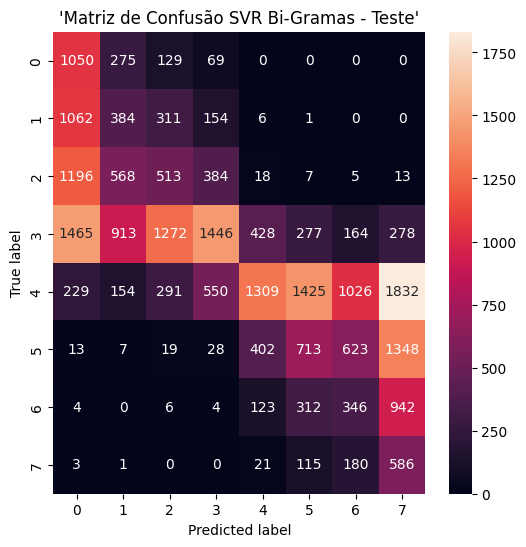

0.8085046747013934
0.638456698788753


In [186]:
linearSVR_bg.fit(DocsTrain_bg,ytrain_bg)
plotMatrizRegression(linearSVR_bg,DocsTest_bg,ytest_bg,"'Matriz de Confusão SVR Bi-Gramas - Teste'")
print(linearSVR_bg.score(DocsTrain_bg,ytrain_bg))
print(linearSVR_bg.score(DocsTest_bg,ytest_bg))

---

## Linear Regression - Bi-Gramas

              precision    recall  f1-score   support

           1       0.66      0.33      0.44      1018
           2       0.21      0.19      0.20       454
           3       0.21      0.20      0.21       481
           4       0.24      0.48      0.32       539
           7       0.21      0.45      0.29       525
           8       0.24      0.20      0.22       618
           9       0.22      0.24      0.23       441
          10       0.54      0.24      0.33       924

    accuracy                           0.29      5000
   macro avg       0.32      0.29      0.28      5000
weighted avg       0.37      0.29      0.30      5000



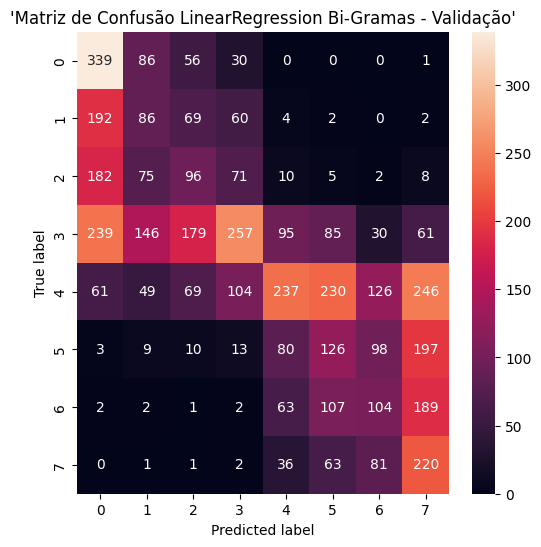

0.8093624844884599
0.8050340855021587


In [187]:
linearRegression_bg = LinearRegression(copy_X=True,fit_intercept=True,positive=False)

linearRegression_bg.fit(DocsValTrain_bg,yValTrain_bg)

plotMatrizRegression(linearRegression_bg,DocsValTest_bg,yValTest_bg,"'Matriz de Confusão LinearRegression Bi-Gramas - Validação'")

print(linearSVR_bg.score(DocsValTrain_bg,yValTrain_bg))
print(linearSVR_bg.score(DocsValTest_bg,yValTest_bg))


              precision    recall  f1-score   support

           1       0.62      0.30      0.40      5022
           2       0.20      0.18      0.19      2302
           3       0.19      0.19      0.19      2541
           4       0.19      0.42      0.26      2635
           7       0.17      0.44      0.25      2307
           8       0.22      0.21      0.22      2850
           9       0.19      0.16      0.18      2344
          10       0.58      0.20      0.30      4999

    accuracy                           0.26     25000
   macro avg       0.30      0.26      0.25     25000
weighted avg       0.36      0.26      0.27     25000



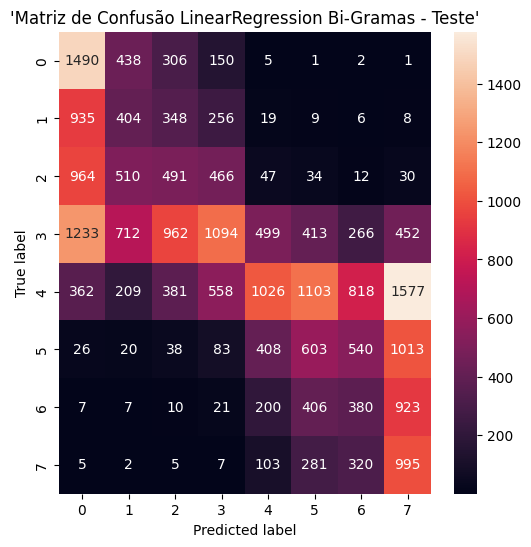

Score treino:  0.9999983355502899
Score teste:  0.5679339178735356


In [188]:
linearRegression_bg.fit(DocsTrain_bg, ytrain_bg)

plotMatrizRegression(linearRegression_bg,DocsTest_bg,ytest_bg,"'Matriz de Confusão LinearRegression Bi-Gramas - Teste'")

print('Score treino: ', linearRegression_bg.score(DocsTrain_bg, ytrain_bg))
print('Score teste: ', linearRegression_bg.score(DocsTest_bg, ytest_bg))


---

# Clustering

In [195]:
param_grid = {
    'n_clusters': [5, 8, 10, 12],  # You can adjust the range based on your data and needs
    'init': ['k-means++', 'random'],
    'n_init': [5, 10],
    'max_iter': [300, 500],
    'tol': [0.0001, 0.001]
}




kmeans = KMeans(n_clusters=10,init='k-means++',n_init=5,max_iter=1000,tol=.00001,verbose=0,random_state=18)
kmeans = kmeans.fit(X,y=y)
C = kmeans.cluster_centers_
labels = kmeans.labels_

In [196]:
Xdense = X.toarray()
print(Xdense.shape)
print(labels.shape)
# plt.figure(figsize=(10,5))
# plt.title('Clusters encontrados')
for i in range((10)):
    print(len(Xdense[labels==i]))

(50000, 25759)
(50000,)
3951
4206
4969
1453
4504
9919
8295
2880
5100
4723


In [201]:
# Loop through each cluster
for cluster in range(10):  # Adjust the range to match the number of clusters
    print(f"\nCluster {cluster}:")
    
    # Get up to 20 documents from the current cluster
    cluster_docs = [doc for i, doc in enumerate(DocsFinal) if labels[i] == cluster]
    for idx, doc in enumerate(cluster_docs[:20]):  # Limit to 20 documents per cluster
        print(f"Document {idx + 1}: {doc}\n")



Cluster 0:
Document 1: A chemical spill is turning people into zombies It s up to two doctor s to survive the epidemic It s an Andreas Schnaas film so you know what the par for the course will be Bad acting horribly awful special effects and no budget to speak of The dubbing is ridiculous with a capital R and the saddest thing is that I feel compelled to write one word about this piece of excrement much less the ten lines mandatory because of the guidelines placed on me by IMDb My original review of merely one word Crap wouldn t fly so I have to revise it and go more in to how bad it is But I don t know if I can so wait I think I may have enough words or lines rather to make this review pass Which is cool I guess So in summation This movie sucks balls don t watch it My Grade F

Document 2: this is one amazing movie you have to realize that chinese folklore is complicated and philosophical there are always stories behind stories i myself did not understand everything but knowing chines

In [202]:
for cluster in range(8):  # Adjust range based on your number of clusters
    cluster_docs = [doc for i, doc in enumerate(Docs) if labels[i] == cluster]
    print(f"Cluster {cluster} has {len(cluster_docs)} documents.")


Cluster 0 has 3951 documents.
Cluster 1 has 4206 documents.
Cluster 2 has 4969 documents.
Cluster 3 has 1453 documents.
Cluster 4 has 4504 documents.
Cluster 5 has 9919 documents.
Cluster 6 has 8295 documents.
Cluster 7 has 2880 documents.


In [203]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

for cluster in range(8):  # Loop over each cluster
    cluster_docs = [doc for i, doc in enumerate(Docs) if labels[i] == cluster]
    
    # Use CountVectorizer to get term frequencies
    vectorizer = CountVectorizer(stop_words='english')
    X_cluster = vectorizer.fit_transform(cluster_docs)
    
    # Sum term frequencies
    term_frequencies = X_cluster.sum(axis=0).A1
    terms = vectorizer.get_feature_names_out()
    
    # Find the top 10 terms
    term_counts = Counter(dict(zip(terms, term_frequencies)))
    top_terms = term_counts.most_common(10)
    print(f"Cluster {cluster}: {top_terms}")


Cluster 0: [('br', np.int64(11477)), ('movie', np.int64(6358)), ('film', np.int64(5018)), ('like', np.int64(3240)), ('just', np.int64(2729)), ('don', np.int64(2203)), ('good', np.int64(2018)), ('watch', np.int64(1921)), ('really', np.int64(1813)), ('time', np.int64(1570))]
Cluster 1: [('br', np.int64(24362)), ('film', np.int64(7582)), ('movie', np.int64(6070)), ('like', np.int64(3947)), ('just', np.int64(3191)), ('good', np.int64(2847)), ('man', np.int64(2822)), ('time', np.int64(2509)), ('life', np.int64(2411)), ('story', np.int64(2264))]
Cluster 2: [('br', np.int64(35880)), ('film', np.int64(17214)), ('movie', np.int64(9468)), ('like', np.int64(5234)), ('story', np.int64(4746)), ('time', np.int64(4314)), ('just', np.int64(4299)), ('good', np.int64(3691)), ('characters', np.int64(3066)), ('films', np.int64(2874))]
Cluster 3: [('br', np.int64(5024)), ('like', np.int64(1492)), ('just', np.int64(1304)), ('episode', np.int64(875)), ('good', np.int64(866)), ('shows', np.int64(849)), ('real

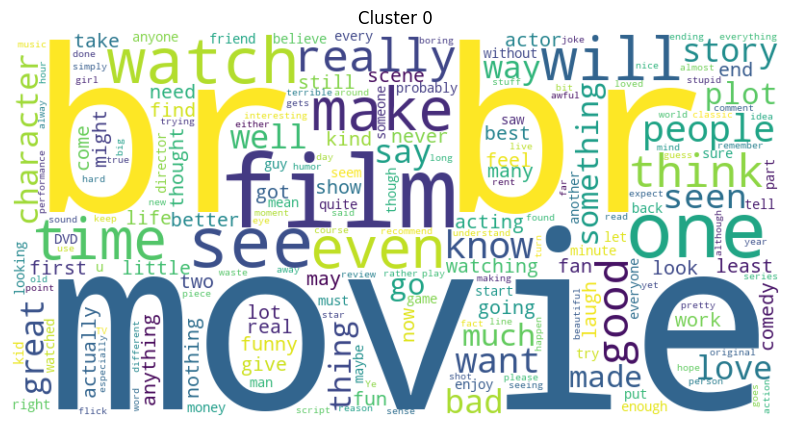

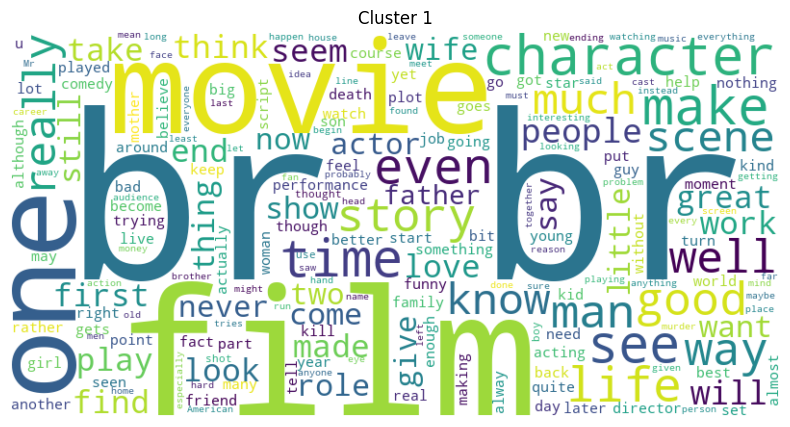

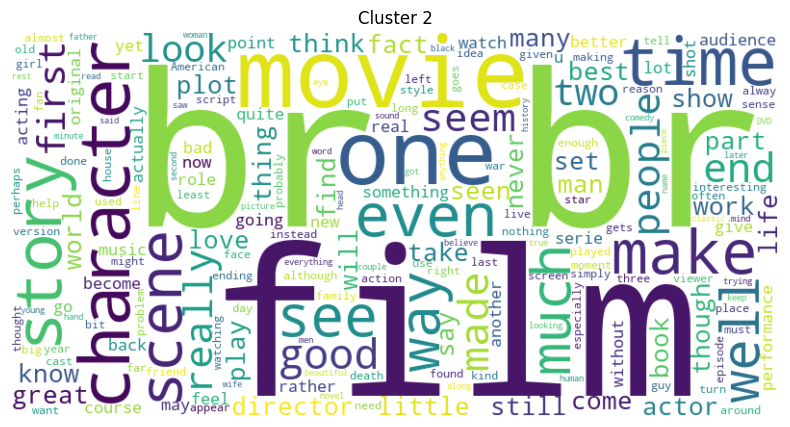

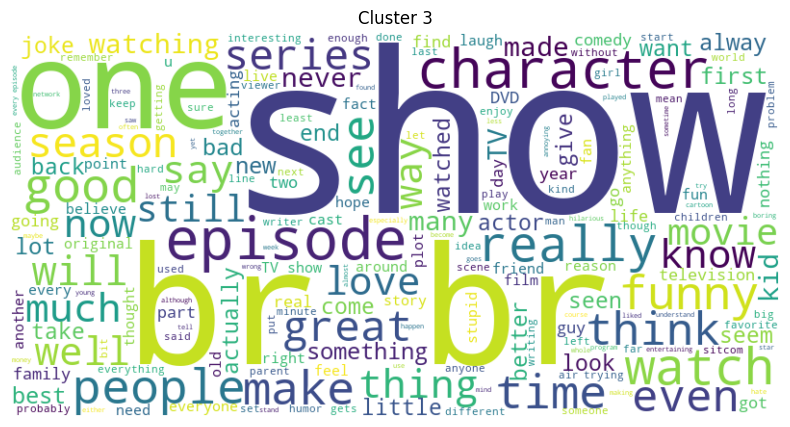

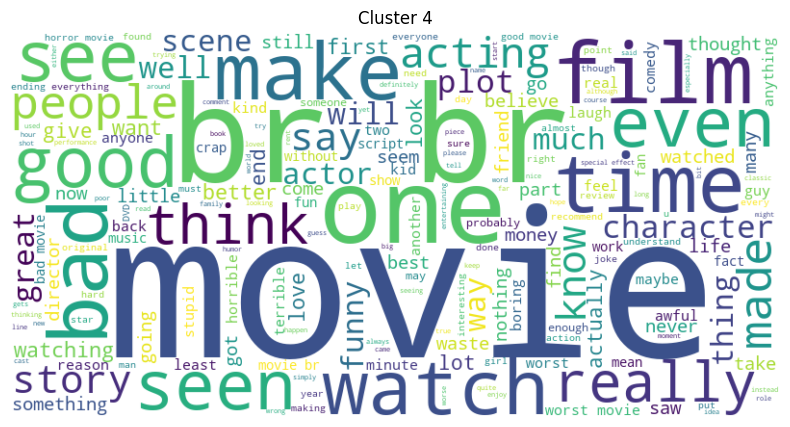

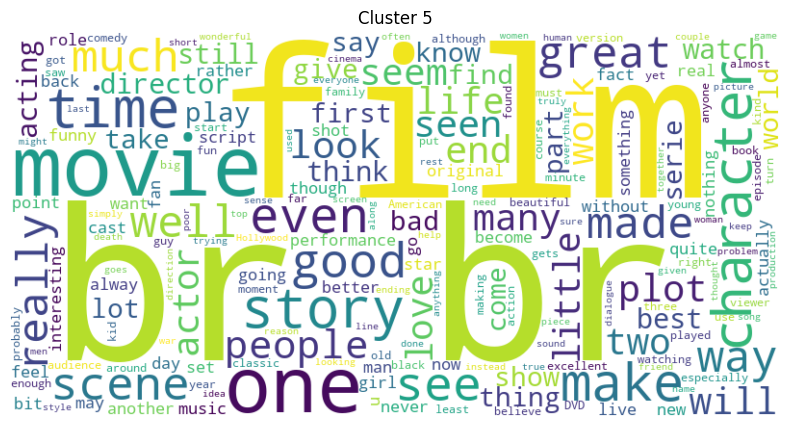

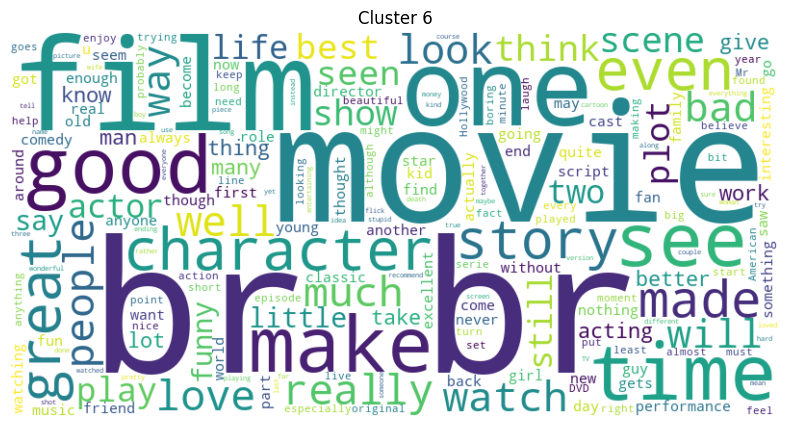

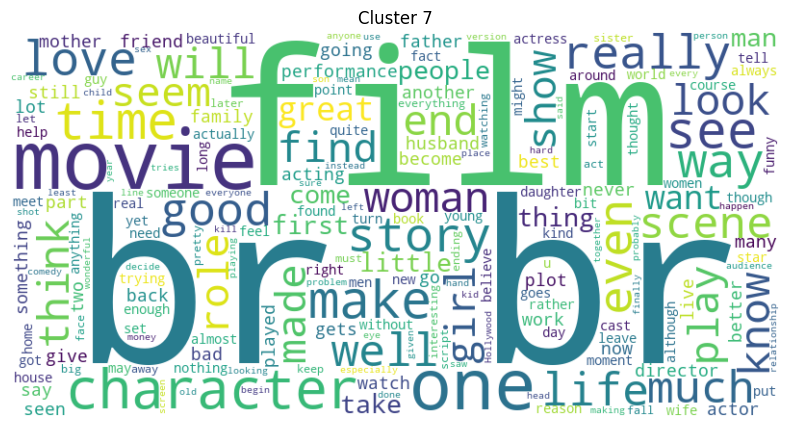

In [204]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for cluster in range(8):
    cluster_docs = " ".join([doc for i, doc in enumerate(Docs) if labels[i] == cluster])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_docs)
    
    plt.figure(figsize=(10, 5))
    plt.title(f"Cluster {cluster}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
